# Test di correlazione

**Test più comuni**
- regressione lineare
- correlazione di Pearson
- correlazione di Spearman


## Regressione lineare
- regressione lineare
- regressione lineare generalizzata
- ...

### Metodo dei minimi quadrati per una regressione lineare
Dati due campioni accoppiati $\{X_n\}_{n=1:N}$, $\{Y_n\}_{n=1:N}$ campionati dalle popolazioni $X$, $Y$, si calcolano i coefficienti $\symbf{\theta} = (a, b)$ dell'approssimazione lineare $y(x|\theta) = a x + b$ che rendono minimo l'errore quadratico medio

$$e(\symbf{\theta}) = \frac{1}{2 N} \sum_{n=1}^{N} (y(x_n|\symbf{\theta}) - y_n)^2 =  \frac{1}{2 N} \sum_{n=1}^{N} (a x_n + b - y_n)^2 \ .$$



La funzione è quadratica in $a$, $b$ e semi-definita positiva. Si cercano i valori che rendono minimo l'errore ponendo uguale a $0$ le derivate parziali dell'errore rispetto ai parametri

$$\begin{aligned}
  0 & = \frac{\partial e}{\partial a} = \frac{1}{N} \sum_{n=1}^N x_n (a x_n + b - y_n) = \frac{1}{N} \sum_{n=1}^N x^2_n \, a + \frac{1}{N} \sum_{n=1}^N x_n \, b - \frac{1}{N} \sum_{n=1}^{N} x_n y_n \\
  0 & = \frac{\partial e}{\partial b} = \frac{1}{N} \sum_{n=1}^N (a x_n + b - y_n)     = \frac{1}{N} \sum_{n=1}^N x_n \, a + b - \frac{1}{N} \sum_{n=1}^{N} y_n \\
\end{aligned}$$

Queste due equazioni formano un sistema lineare di due equazioni in due incognite, che può essere riscritto con il formalismo matriciale

$$\begin{bmatrix} \frac{1}{N} \sum_{n=1}^N x^2_n & \frac{1}{N} \sum_{n=1}^N x_n  \\ \frac{1}{N} \sum_{n=1}^N x_n & 1 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum_{n=1}^{N} x_n y_n \\ \frac{1}{N} \sum_{n=1}^{N} y_n \end{bmatrix} \ .$$

Il valore dei coefficienti ottimi $\theta^* = (a, b)$ che minimizzano l'errore quadratico medio si trova come soluzione del sistema lineare, l'errore quadratico medio minimo dovuto all'approssimazione viene calcolato in seguito, $e(\theta^*)$. La bontà dell'approssimazione lineare può essere valutata in termini dell'errore quadratico medio.

**Regressione e SL.** Una delle applicazioni fondamentali in ML, in particolare in SL, è la regressione o l'approssimazione di funzioni; scelta del modello...

### Metodo ed errore


Il sistema lineare può essere riscritto come

$$\begin{bmatrix} \frac{1}{N} \sum_{n=1}^N x^2_n & \bar{x}  \\ \bar{x} & 1 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum_{n=1}^{N} x_n y_n \\ \bar{y} \end{bmatrix} \ ,$$

e la soluzione 

$$\begin{aligned}
 \begin{bmatrix} a \\ b \end{bmatrix} & = \frac{1}{\frac{1}{N} \sum_{n=1}^N x^2_n - \bar{x}^2} \begin{bmatrix} 1 & -\bar{x}  \\ -\bar{x} & \frac{1}{N} \sum_{n=1}^N x^2_n \end{bmatrix} \, \begin{bmatrix} \frac{1}{N} \sum_{n=1}^{N} x_n y_n \\ \bar{y} \end{bmatrix} = \\
 & = \frac{1}{\frac{1}{N} \sum_{n=1}^N x^2_n - \bar{x}^2} \begin{bmatrix} \frac{1}{N} \sum_{n=1}^N x_n y_n - \bar{x}\bar{y} \\ -\frac{\bar{x}}{N} \sum_{n=1}^N x_n y_n + \frac{\bar{y}}{N} \sum_{n=1}^N x_n^2 \end{bmatrix} = \\
 & = \frac{1}{R_x - \bar{x}^2} \begin{bmatrix} R_{xy} - \bar{x} \bar{y} \\ -\bar{x} R_{xy} + \bar{y} R_x \end{bmatrix}
\end{aligned}$$

L'errore minimo diventa quindi

$$\begin{aligned}
  e & = \frac{1}{2N} \sum_{m=1}^{N} \left( a \, x_m  + b -  y_m \right)^2 = \\
    & = \frac{1}{2 N} \sum_{m=1}^N \left( a^2 x_m^2 + b^2 + y_m^2 + 2 a b x_m - 2 b y_m - 2 a x_m y_m  \right) \\
\end{aligned}$$

$$\begin{aligned}
2 e & = \frac{1}{N} \left[ a^2 \sum_{m=1}^{N} x_m^2 + N b^2 + \sum_{m=1}^N y_m^2 + 2 a b \bar{x} - 2 b \bar{y} - 2 a \sum_{m=1}^{N} x_m y_m  \right] = \\
  & = a^2 R_x + b^2 + R_y + 2 a b \bar{x} - 2 b \bar{y} - 2 a R_{xy} \\
\end{aligned}$$

$$\begin{aligned}
2 e & = \left( \frac{R_{xy} - \bar{x} \bar{y}}{R_x - \bar{x}^2} \right)^2 R_x + \left( \frac{-\bar{x} R_{xy} + \bar{y} R_x}{R_x - \bar{x}^2} \right)^2 + R_y + 2 \left( \frac{R_{xy} - \bar{x} \bar{y}}{R_x - \bar{x}^2} \right) \left( \frac{-\bar{x} R_{xy} + \bar{y} R_x}{R_x - \bar{x}^2} \right) \bar{x} - 2 \left( \frac{-\bar{x} R_{xy} + \bar{y} R_x}{R_x - \bar{x}^2} \right) \bar{y} - 2 \left( \frac{R_{xy} - \bar{x} \bar{y}}{R_x - \bar{x}^2} \right) R_{xy} \\
\end{aligned}$$

$$
2 e = \frac{1}{D^2}\left[ R_{xy}^2 R_x - 2 x y R_{xy} R_x + x^2 y^2 R_x + \dots \right]
$$

## Correlazione di Pearson

Il **coefficiente di correlazione** tra due variabili casuali $X$, $Y$ è definito come il rapporto tra la loro covarianza e il prodotto delle loro deviazioni standard,

$$\rho_{XY} = \frac{\mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}(Y))]}{\sqrt{\mathbb{E}[(X-\mathbb{E}[X])^2]}\sqrt{\mathbb{E}[(Y-\mathbb{E}[Y])^2]}} = \frac{\sigma^2_{XY}}{\sigma_X \, \sigma_Y} \ .$$

**Coefficiente di correlazione per campioni.** Usando le statistiche campionarie per i campioni a disposizione delle due popolazioni,

$$\begin{aligned}
  r_{xy} 
  & = \frac{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{ \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}\sqrt{ \frac{1}{n-1} \sum_{i=1}^{n} (y_i - \bar{y})^2}} = \\
  & = \frac{1}{n-1} \sum_{i=1}^n \left( \frac{x_i - \bar{x}}{S_x} \right) \left( \frac{y_i - \bar{y}}{S_y} \right) = \\
  & = \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{ \sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2}\sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2}} \ .
\end{aligned}$$

**Coefficiente di correlazione in statistica inferenziale.** I metodi di statistica basati sul coefficiente di correlazione di Pearson hanno due obiettivi:
1. valutare l'ipotesi nulla $\text{H}_0$ che afferma che l'assenza di correlazione tra le due popolazioni, $\rho = 0$, sulla base del valore del coefficiente $r$ calcolato sui campioni
2. fornire un intervallo di confidenza che contenga $\rho$

Alcuni metodi per ottenere questi due obiettivi sono:
- permutazione
- bootstrap
- errore standard, assumendo una relazione lineare tra $x$ e $y$, con l'aggiunta di un errore gaussiano $\varepsilon$, $y = a x + b + \varepsilon$, $\sigma_r = \sqrt{\frac{1-r^2}{n-2}}$
- $t$-test sulla variabile $t = \frac{r}{\sigma_r}$
- ...

## Correlazione di Spearman

- per ranghi
- per relazioni non lineari ma monotone
... **todo**

## Esempio

Si valutano i metodi di correlazione per 4 coppie di campioni, 2 che mostrano una buona correlazione e 2 con correlazione scarsa

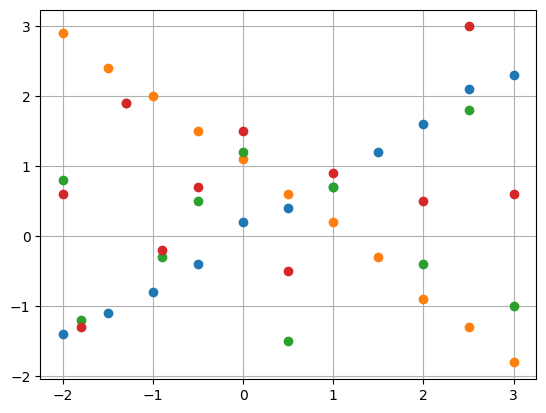

In [26]:
# Test correlation algorithms

import numpy as np
import matplotlib.pyplot as plt

#> Data
pairs = [
{    # Good Positive Correlation
    'x': np.array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]),
    'y': np.array([-1.4, -1.1, -0.8, -0.4, 0.2, 0.4, 0.7, 1.2, 1.6, 2.1, 2.3])
},
{    # Good Negative Correlation
    'x': np.array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]),
    'y': np.array([2.9, 2.4, 2.0, 1.5, 1.1, 0.6, 0.2, -0.3, -0.9, -1.3, -1.8])
},
{   # Bad Correlation
    'x': np.array([-2.0, -1.8, -1.3, -0.9, -0.5, 0.0, 0.5, 1.0, 2.0, 2.5, 3.0]),
    'y': np.array([0.8, -1.2, 1.9, -0.3, 0.5, 1.2, -1.5, 0.7, -0.4, 1.8, -1.0])
},
{   # Bad Correlation
    'x': np.array([-2.0, -1.8, -1.3, -0.9, -0.5, 0.0, 0.5, 1.0, 2.0, 2.5, 3.0]),
    'y': np.array([0.6, -1.3, 1.9, -0.2, 0.7, 1.5, -0.5, 0.9, 0.5, 3.0, 0.6])
}
]

plt.figure()
for i in range(len(pairs)):
    plt.plot(pairs[i]['x'], pairs[i]['y'], 'o', color=plt.cm.tab10(i))

plt.grid()

> Pair 0
  Regression coeffs y = 0.7673 x + 0.0527, with error 0.0831
  Pearson correlation: 0.9977, sigma: 0.0228
> Pair 1
  Regression coeffs y = -0.9364 x + 1.0500, with error 0.0477
  Pearson correlation: -0.9995, sigma: 0.0107
> Pair 2
  Regression coeffs y = -0.0604 x + 0.2410, with error 1.1254
  Pearson correlation: -0.0882, sigma: 0.3320
> Pair 3
  Regression coeffs y = 0.2573 x + 0.6415, with error 1.0330
  Pearson correlation: 0.3800, sigma: 0.3083


Text(44.222222222222214, 0.5, 'y')

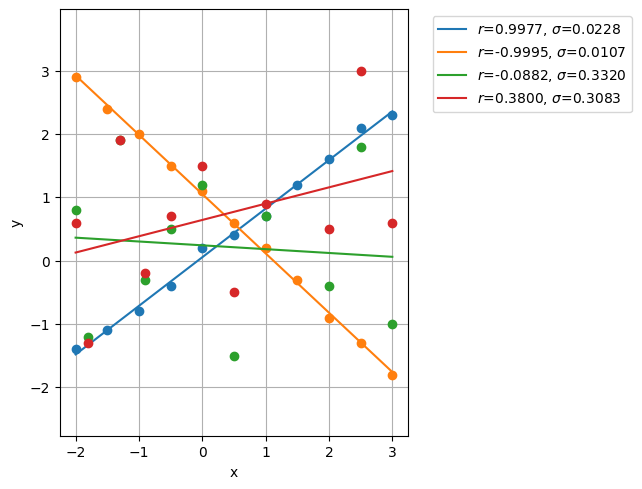

In [32]:
plt.figure()


for i in range(len(pairs)):
    #> Scale and normalize data
    x, y = pairs[i]['x'], pairs[i]['y']
    n = len(pairs[i]['x'])
    # ...
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    nSxy = np.sum( (x-x_mean) * (y-y_mean) )
    nSx2 = np.sum( (x-x_mean)**2 )
    nSy2 = np.sum( (y-y_mean)**2 )
    
    #> LS linear system
    A = np.array([ [ np.sum(x**2) , np.sum(x)], [ np.sum(x), n ] ] ) / n
    f = np.array([ np.sum(x * y) , np.sum(y) ]) / n

    #> Find coefficients of the regression
    z = np.linalg.solve(A, f)

    #> Find average square error
    e = np.sum( ( z[0]*x + z[1] - y )**2 ) / n

    #> Pearson
    #> correlation coefficient
    r = nSxy / np.sqrt( nSx2 * nSy2 )
    #> sigma
    sigma = np.sqrt( (1 - r**2) / ( n-2 ) )

    print(f"> Pair {i}")
    print(f"  Regression coeffs y = {z[0]:.4f} x + {z[1]:.4f}, with error {e**.5:.4f}")
    print(f"  Pearson correlation: {r:.4f}, sigma: {sigma:.4f}")

    plt.plot(x, y          , 'o', color=plt.cm.tab10(i))
    plt.plot(x, z[0]*x+z[1], '-', color=plt.cm.tab10(i), label=f"$r$={r:.4f}, $\sigma$={sigma:.4f}")

plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0))
plt.tight_layout()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
